In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  blogin1
working directory set to /home/hbkoziel/pyfesom


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
#from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
#import cmocean as cmaps
import pandas as pd
#from matplotlib.colors import ListedColormap

In [3]:
# PLOT CONFIGURATION #

# figure export 
export_plot = True
# figure export definition
dpicnt=300
# choose simulation
runid='Arc12'
# choose date
first_year = 1980
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = False
# load the given biological tracer #
var_id= 'area'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/CSV/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/pyfesom/figures/Arc12/ already existing


In [4]:
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=get3d)

/home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/pickle_mesh


In [5]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [6]:
limphy = genfromtxt(outputpath+'LIMphy_1980_2015_timeseries.csv', delimiter=';')
limdia = genfromtxt(outputpath+'LIMdia_1980_2015_timeseries.csv', delimiter=';')

In [7]:
lim_phy_fe          = np.zeros(shape=(len(years)))
lim_phy_n          = np.zeros(shape=(len(years)))
lim_phy_light           = np.zeros(shape=(len(years)))

lim_dia_fe          = np.zeros(shape=(len(years)))
lim_dia_n          = np.zeros(shape=(len(years)))
lim_dia_si          = np.zeros(shape=(len(years)))
lim_dia_light    = np.zeros(shape=(len(years)))
                         
for ind in range(0,len(years)):
    #print years[ind]
    ind_fe = np.nonzero((mesh.y2>66) & (limphy[ind,:]==0))
    lim_phy_fe[ind] = np.sum(NodalAreaModel[ind_fe])
    ind_n = np.nonzero((mesh.y2>66) & (limphy[ind,:]==1))
    lim_phy_n[ind] = np.sum(NodalAreaModel[ind_n])
    ind_light = np.nonzero((mesh.y2>66) & (limphy[ind,:]==2))
    lim_phy_light[ind] = np.sum(NodalAreaModel[ind_light])    
    
    ind_fe = np.nonzero((mesh.y2>66) & (limdia[ind,:]==0))
    lim_dia_fe[ind] = np.sum(NodalAreaModel[ind_fe])
    ind_n = np.nonzero((mesh.y2>66) & (limdia[ind,:]==1))
    lim_dia_n[ind] = np.sum(NodalAreaModel[ind_n])
    ind_si = np.nonzero((mesh.y2>66) & (limdia[ind,:]==2))
    lim_dia_si[ind] = np.sum(NodalAreaModel[ind_si])
    ind_light = np.nonzero((mesh.y2>66) & (limdia[ind,:]==3))
    lim_dia_light[ind] = np.sum(NodalAreaModel[ind_light])    

In [8]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

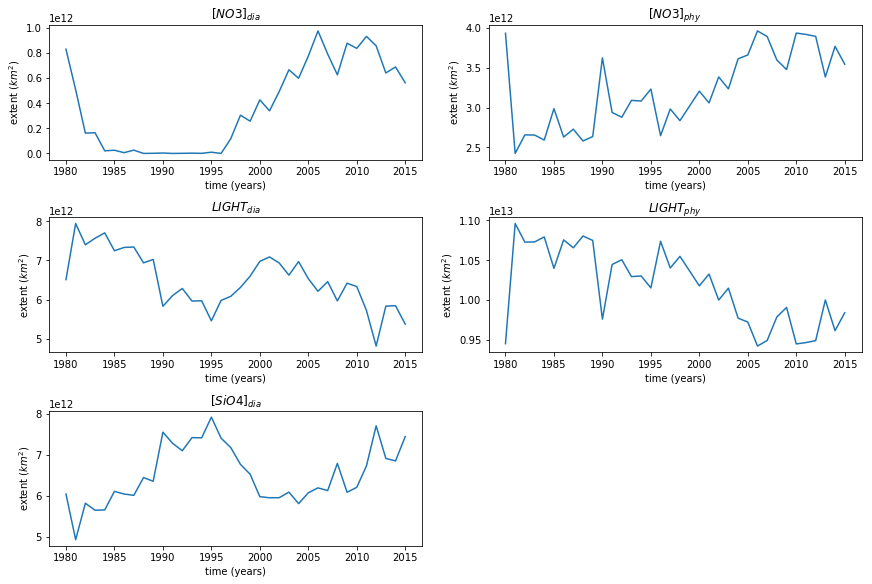

In [9]:
figsize = (12, 8)
rows,cols = 3,2

axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
axs = trim_axs(axs, 5)

#fig, axs = plt.subplots(3,2, sharex=True, sharey=False)

#axs[0].plot(years,lim_phy_fe)

axs[0].plot(years,lim_dia_n)
axs[0].set_title('$[NO3]_{dia}$')
axs[0].set_xlabel('time (years)')
axs[0].set_ylabel('extent ($km^2$)')

axs[2].plot(years,lim_dia_light)
axs[2].set_title('$LIGHT_{dia}$')
axs[2].set_xlabel('time (years)')
axs[2].set_ylabel('extent ($km^2$)')

axs[4].plot(years,lim_dia_si)
axs[4].set_title('$[SiO4]_{dia}$')
axs[4].set_xlabel('time (years)')
axs[4].set_ylabel('extent ($km^2$)')

axs[1].plot(years,lim_phy_n)
axs[1].set_title('$[NO3]_{phy}$')
axs[1].set_xlabel('time (years)')
axs[1].set_ylabel('extent ($km^2$)')

axs[3].plot(years,lim_phy_light)
axs[3].set_title('$LIGHT_{phy}$')
axs[3].set_xlabel('time (years)')
axs[3].set_ylabel('extent ($km^2$)')

plt.savefig(savepath+'sertemp/LIMFACTOREXTENT_timeseries_'+str(first_year)+'_'+str(last_year)+'.png', dpi = dpicnt, bbox_inches='tight')      